# Týmový projekt

## Dataset: Kompletní údaje o hráčích - FIFA 2019

### Popis datasetu a určení cíle úlohy

 Dataset, který byl vybrán k této klasifikační úloze, obsahuje kompletní údaje o hráčích ve hře FIFA 2019. Každému z hráčů jsou přiřazeny základní atributy jako věk, národnost, tým, celkové hodnocení nebo potenciál značící úroveň, na kterou se může teoreticky maximálně dostat. Každý hráč má danou  výchozí pozici na hřišti, na které by měl nastupovat dle jeho individuálních schopností, a dále mi určen rating (hodnocení) i pro všechny ostatní pozice na hřišti (těchto pozic je celkem 26). Tyto schopnosti jsou individuální a nejsou ovlivněny schopnostmi ostatních hráčů v týmu.
Jednotlivé individuální schopnosti hráčů v datasetu jsou blíže popsány zde: https://www.fifauteam.com/fifa-19-attributes-guide/#1
Cílem této úlohy, jak již bylo naznačeno, je klasifikace, konkrétně se náš tým bude snažit klasifikovat hráče do jednotlivých skupin dle pozic na hřišti na základě jejich individuálních schopností.

### Průzkumová analýza a předzpracování dat

Předtím než se budeme věnovat úvodnímu zkoumání datasetu je nutné nejdříve naimportovat všechny balíčky, které jsou potřebné pro práci s daty. Pro manipulaci s daty využijeme knihovny "pandas" a "numpy". Pro namapování úložiště, ve kterém uložen dataset, je potřeba mít k dispozici balíček "os".

In [1]:
# příkaz pro spouštění všech příkazu v buňce najednou
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import balíčků určených pro práci s datasetem
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.stats import randint
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# načtení datasetu
df = pd.read_csv("data.csv")

Díky průzkumové analýze dat (zkráceně EDA) zvoleného datasetu lze zjistit určité souhrnné informace o datech jako například rozměry datasetu nebo počet chybějících hodnot, se kterými se pak následně bude třeba vypořádat. Pro tvorbu jakéhokoliv prediktivního modelu je EDA nezbytnou součástí a prvním krokem na cestě k úspěchu.
Pro tuto část byly zvoleny metody balíčku pandas, konkrétně .head, zobrazující prvních několik řádků datasetu, .info, díky čemuž získáme informaci o počtu nenulových řádků jednotlivých atributů a počtu typů objektů, a .describe, počítající základní popisné statistiky jako průměr, směrodatná odchylka, kvartily či minimální a maximální hodnoty jednotlivých atributů.

In [4]:
# Základný náhľad na dáta
df.head()
df.info()
df.describe()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


V této úloze jsou pro klasifikaci pozic hráčů podstatné pouze atributy ovlivňující právě pozici, na které se hráč na hřišti nachází. K tomuto účelu budeme potřebovat hodnoty individuálních schopností hráčů  nacházející se ve sloupci "Crossing" až "GKReflexes". Zbytek sloupců kromě základních informací o hráčích můžeme tedy z datasetu odstranit.

In [5]:
# odstranění nepotřebných sloupců
df.drop(['Wage', 'Work Rate','Height','Weight','Age','Photo','Nationality','Flag','Potential','Club','Club Logo',
         'Special','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Body Type','Real Face',
         'Jersey Number','Joined','Loaned From','Contract Valid Until','LS','ST','RS','LW','LF','CF','RF','RW','LAM',
         'CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB',
         'Release Clause'], axis=1, inplace=True)

Nakoľko niektoré metody, ktoré sme sa rozhodli v našej práci využiť vyžadujú aby data neobsahovali chýbajúce hodnoty, museli sme sa s týmto nedostatkom vysporiadať. Na základe skúmania dát pred samotnou analýzou sme zistili, že ak sú chýbajúce hodnoty v niektorom zo stlpcov využívaných pre analýzu, potom  chýbajú pre daný záznam takmer všetky potrebné atribúty. Preto sme sa rozhodli tieto - vačšinou takmer prázdne - záznamy vyhodiť. Iné metody - nahradzovanie, alebo iné zaobchádzanie s chýbajúcimi hodnotami sa nejaví v pri danom datasete ako výhodnejšie, pretože tieto metody by mohli do analýzy zaniesť vačšie chyby, než predstavuje strata informácie uložená v neúplných záznamoch. Strata 60 záznamov z ~1800 záznamov sa preto javí ako prijateľná, a najlepšia možná.

In [6]:
df = df.dropna()

Klasifikovať jednotlivé pozície hráča vrátane strany a či je pozícia viac vysunutá alebo obranná sa nejaví ako ideálna možnosť, pretože v originálnom datasete je spomínaných takmer 30 pozícií, ktoré sú závislé nielen od týmu, ale aj od formácie v konrétnom zápase. To by mohlo znamenať pre jednoho hráča rôzne vhodné pozície, avšak túto informáciu v datasete nemáme. Proto provedeme sdružení jednotlivých pozic neuvažující stranu a vysunutí do  obecnějších kategorií: F(1) - Forward, M(2) - Midfielder, B(3) - Back a G(4) - Goalkeeper.

In [7]:
# sdružení pozic do kategorií
def position_general (row):
   if (row['Position'] == 'ST')|(row['Position'] == 'RW')|(row['Position'] == 'LF')|(row['Position'] == 'LS')|(row['Position'] == 'LW')|(row['Position'] == 'RF')|(row['Position'] == 'RS')|(row['Position'] == 'CF'):
      return 1
   if (row['Position'] == 'CAM')|(row['Position'] == 'CDM')|(row['Position'] == 'CM')|(row['Position'] == 'LAM')|(row['Position'] == 'LCM')|(row['Position'] == 'LDM')|(row['Position'] == 'LM')|(row['Position'] == 'RAM')|(row['Position'] == 'RCM')|(row['Position'] == 'RDM')|(row['Position'] == 'RM'):
      return 2
   if (row['Position'] == 'CB')|(row['Position'] == 'LB')|(row['Position'] == 'LCB')|(row['Position'] == 'LWB')|(row['Position'] == 'RB')|(row['Position'] == 'RCB')|(row['Position'] == 'RWB'):
      return 3
   if row['Position'] == 'GK':
      return 4
df['position_general'] = df.apply(position_general, axis=1)

Pre ukážku sme si vybrali niektoré atribúty aby sme si na boxplotoch zobrazili aké majú rozdelenie podľa skupín. z grafov je zrejmé že odlišnosti sú, avšak nie veľmi významné. Každopádne k výsledku môže dopomocť kombinácia ich odličností.
Nižšie zobrazené grafy sú zobrazenené podľa skupín teda v následujúcom poradí: útočník, záložník, obránca a brankár

In [8]:
# Najskôr pretypujeme premenné zo stringu na integer
Acceleration = df['Acceleration'].astype('Int32')
Finishing = df['Finishing'].astype('Int32')
LongPass  = df['LongPassing'].astype('Int32')

In [9]:
# vytvoríme vector boolenov podľa pozície hráča pre výber iba potrebných dát do grafov
b_F = df['position_general'] == 1
b_M = df['position_general'] == 2
b_B = df['position_general'] == 3
b_G = df['position_general'] == 4

In [10]:
# Príprava dát pre grafy:
data_a = [Acceleration[b_F], Acceleration[b_M], Acceleration[b_B], Acceleration[b_G]]
data_f = [Finishing[b_F], Finishing[b_M], Finishing[b_B], Finishing[b_G]]
data_lp= [LongPass[b_F], LongPass[b_M], LongPass[b_B], LongPass[b_G]]

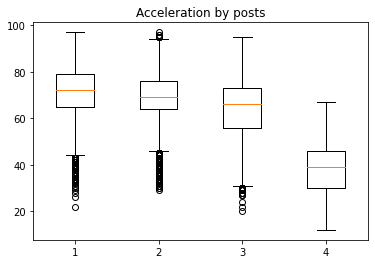

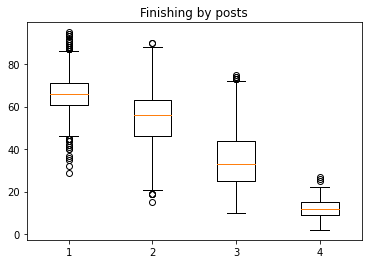

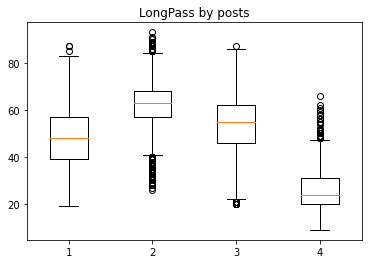

In [11]:
# Zobrazenie grafov
fig, ax = plt.subplots();
ax.boxplot(data_a);
ax.set_title('Acceleration by posts');
plt.show();

fig, ax = plt.subplots();
ax.boxplot(data_f);
ax.set_title('Finishing by posts');
plt.show();

fig, ax = plt.subplots();
ax.boxplot(data_lp);
ax.set_title('LongPass by posts');
plt.show();

Nyní je již vhodné se blíže zaměřit na jednotlivé vysvětlující proměnné. Myšlenkou zůstává, že mám za cíl vytvořit efektivní model, s co nejmenším počtem vysvětlujících proměnných tak, aby zůstala kvalita modelu co nejlepší. Pro tyto potřeby jsme si vyselektovali pouze sloupce se schopnostmi a charakteristikami do samostatného datasetu, se kterým budeme dále pracovat.

In [12]:
# vytvoření tabulky jen se skilly hráčů
skill_atr = df.iloc[:,6:]
print(skill_atr.corr())

                  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
Crossing          1.000000   0.655445         0.469579      0.809838   
Finishing         0.655445   1.000000         0.473478      0.662078   
HeadingAccuracy   0.469579   0.473478         1.000000      0.640238   
ShortPassing      0.809838   0.662078         0.640238      1.000000   
Volleys           0.690417   0.882724         0.505759      0.698470   
Dribbling         0.856716   0.824390         0.550736      0.843862   
Curve             0.833251   0.759414         0.440917      0.775549   
FKAccuracy        0.761331   0.697784         0.407794      0.736849   
LongPassing       0.756569   0.512963         0.510912      0.895679   
BallControl       0.841006   0.788455         0.658193      0.911520   
Acceleration      0.668509   0.606565         0.329840      0.566191   
SprintSpeed       0.645726   0.593997         0.379588      0.555102   
Agility           0.698586   0.644425         0.260667      0.61

Korelační tabulka zachycující závislosti mezi schopnostmi hráče pomůže nalézt jedinečné parametry a odstranit z dat duplicitní informace. K selekci jedinečných atributů jsme zvolili vytvoření funkce, které z datasetu vytáhne pouze atributy, mezi nimiž je hodnota absolutního korelačního koeficientu nižší než stanovená hranice (v našem případě 0.8, což považujeme za silnou závislost). Očištěná data uloží tato funkce do nového datasetu. Funkce byla převzata z internetového fóra Stackoverflow.
https://stackoverflow.com/questions/49282049/remove-strongly-correlated-columns-from-dataframe

In [13]:
# funkce ořezávající proměnné u zvoleneného datasetu, mezi kterými je korelace vyšší než stanovené hranice
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

# vytvoření datasetu pouze se skilly hráčů, které nejsou vysoce korelované
new_skill_atr = trimm_correlated(skill_atr, 0.8)

Ořezáním datasetu o vysoce korelované proměnné jsme ubrali 21 atributů, což je poměrně vysoký počet, přičemž jsme pravděpodobně neztratili příliš mnoho informací o hráčích co se efektivity následné predikce týče. Nyní už je vhodné přistoupit ke klasifikaci hráčů. K té byly vybrány 2 klasifikátory - KNN a Random Forest, jež se oba řadí mezi tzv. "supervised ML algorithms". Bližší popis se nachází níže.

#### Klasifikace

V tomto případě klasifikace bude využita metoda rozdělení dat na trénovací a testovací část. Na trénovacích dat se model naučí, které schopnosti jsou pro hráče na daných pozicích důležité a následně na testovacích datech bude podle schopností hráčů provedena klasifikace. Data budou rozdělena v poměru 70:30 (train:test) u obou klasifikátorů pro lepší srovnatelnost. Před samotnou klasifikací je třeba nejprve určit cílovou proměnnou "y" a vysvětlující proměnné "X".

In [14]:
# určení vysvětlujících a vysvětlované proměnné
y = df['position_general'].values
X = new_skill_atr[:].values
y = y.astype(int)
X = X.astype(int)
print(X.shape)
print(y.shape)

(18147, 14)
(18147,)


In [15]:
##### KNN klasifikátor

Tento klasifikátor je jeden z nejjednodušších "supervised ML" algoritmů. Jednoduše vypočítá vzdálenost testovacích, dříve neoznačených dat, od těch trénovacích. Následně podle zvolených K-nejbližších sousedů se podívá, do jakých tříd spadají tyto sousední body a k té nejpočetnější kategorii zařadí testovací datový bod. Tento proces provede u všech testovacích dat. Výhodou toho algoritmu je jednoduchost implementace díky malému počtu parametrů potřebných k nastavení modelu. Současně mu stačí krátký čas k natrénování klasifikace, což ho činí mnohem rychlejším ve srovnání s ostatními algoritmy. Nevýhodou je, že nepracuje tak dobře s daty s vysokou dimenzionalitou, která činí obtížným výpočet vzdáleností mezi dimenzemi.

In [16]:
# rozdělení dat na trénovací a testovací část
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# stanovení klasifikátoru
knn = KNeighborsClassifier()

# nastavení prostoru pro tuning parametrů klasifikátoru
param_grid = {'n_neighbors' : randint(1,10),
             'leaf_size' : randint(15,50)}

# křížová validace všech možných kombinací parametrů modelu
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3)

# natrénování modelu na trénovacích datech
knn_cv.fit(X_train,y_train)

# predikce vysvětlované proměnné u testovacích dat
y_pred = knn_cv.predict(X_test)

# evaluace modelu a vyhodnocení zlepšení parametrů
print("Best Parameters: {}".format(knn_cv.best_params_))
print("Accuracy of classification: {}".format(metrics.accuracy_score(y_test, y_pred)))

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fca06cdd8>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fca0762b0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

Best Parameters: {'leaf_size': 31, 'n_neighbors': 7}
Accuracy of classification: 0.8490358126721763


Data byla rozdělena na trénovací a testovací část v poměru 70:30. K vylepšení byly zvoleny 2 parametry - počet sousedů a velikost listu, obou bylo stanoveno rozmezí hodnot, ve kterém se mohou pohybovat. Díky následné křížové validaci, která vzala vpotaz všechny možné kombinace určených parametrů a vybrala tu nejvhodnější, bylo možné predikovat kategorie u testovacích dat. Tato predikce byla provedena s téměř 86% přesností.

##### Random Forest

Random Forest je také jedním ze skupiny "supervides ML" algoritmů. Je tvořen rozhodovacími stromy, jejichž početnost rozhoduje o robustnosti tohoto algoritmu. Tento algoritmus si vybere náhodně data, ta pošle jednotlivým stromům ke zpracování a jejich výsledky zprůměruje, čímž dostane finální hodnotu klasifikace. Random Forest je považován za vysoce přesný a robustní právě díky počtu rozhodovacích stromů, které se podílejí na výsledku. Nevýhodou algoritmu je zdlouhavější proces výpočtu a horší interpretace výsledků ve srovnání klasických rozhodovacích stromů.

In [17]:
# nastavení modelu a rozdelení dat na trénovací a testovací
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3)

In [18]:
# nastavení prostoru pro tuning parametrů
param_grid = {
    'max_depth': [50, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 11],
    'n_estimators': [80, 100]
}
#vytvotríme klasifikátor
rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_grid, cv = 3, random_state = 118, n_iter = 5)

# natrénování modelu na trénovacích datech
rf_cv.fit(X_train1,y_train1)

# predikce vysvětlované proměnné u testovacích dat
y_pred1 = rf_cv.predict(X_test1)

print("Best parameters: {}".format(rf_cv.best_params_))
print("Accuracy of classification: {}".format(rf_cv.score(X_test1, y_test1)))

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Best parameters: {'n_estimators': 80, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 3, 'max_depth': 50}
Accuracy of classification: 0.8701561065197428


U klasifikátoru Random Forest byl zvolen téměr shodný postup jako u KNN, přičemž byly samozřejmě zvoleny jiné parametry ke zlepšení modelu. Přesnost predikce u testovacích dat byla tentokrát vyšší o 1 %. Random Forest bychom tedy v tomto případě zhodnotili jako přesnější a účinnější algoritmus.

#### Závěrečné shrnutí

V této úloze se nám podařilo prozkoumat data shrnující kompletní informace o hráčích ve hře FIFA 2019. Tento objemný dataset jsme zredukovali na nejpotřebnější parametry a pokusili se vytvořit 2 klasifikační modely, díky kterým by mělo být možné predikovat pozici hráče na hřišti na základě jeho fyzických a mentálních schopností. Oba modely se ukázaly jako poměrně přesné, ani jeden z nich nebyl za nastavených podmínek výrazně horší či lepší než druhý.